<a href="https://colab.research.google.com/github/manulthanura/AI-Computer-Vision/blob/main/Tutorial_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mean Filter (Averaging Filter)
A mean filter, also known as an averaging filter, is a simple and commonly used image processing filter that smoothes images and reduces noise. It operates by replacing the value of each pixel with the average value of the intensities in its neighborhood. The neighborhood is defined by a kernel, which is typically a square matrix that slides over the entire image.

Key characteristics of a mean filter include:

1. Noise Reduction:
It is effective at reducing random noise in an image, making it useful for preliminary image processing before applying more complex algorithms.

2. Uniform Averaging:
Each pixel in the neighborhood contributes equally to the final value. The size of the kernel (e.g., 3x3, 5x5) determines how many neighboring pixels are considered.

3. Blurring Effect:
While it reduces noise, the mean filter also blurs the image, smoothing out edges and fine details. This can be both an advantage and a disadvantage, depending on the application.

4. Simple Implementation:
The mean filter is computationally simple and straightforward to implement, making it a good choice for basic image processing tasks.

5. Limitation:
It does not preserve edges well, which can be problematic in applications where edge information is crucial.

The mean filter is widely used in various applications for its simplicity and effectiveness in reducing noise, albeit at the cost of losing some image details and sharpness.

#### Example 01

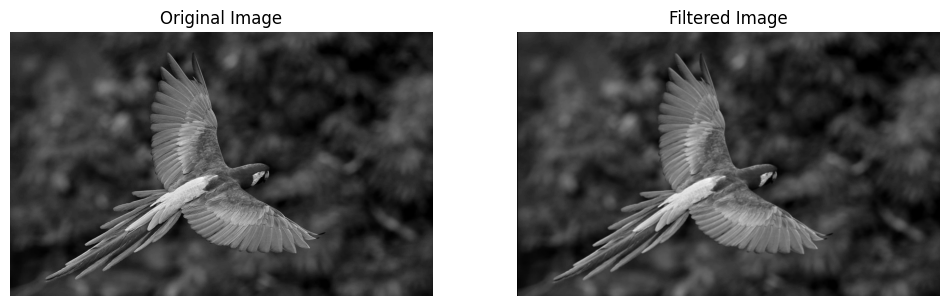

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def mean_filter(image, kernel_size):
    # Convert image to a numpy array
    img_array = np.asarray(image)

    # Get image dimensions
    height, width = img_array.shape

    # Define the kernel dimensions
    kernel_height, kernel_width = kernel_size

    # Padding dimensions
    pad_height = kernel_height-1 // 2
    pad_width = kernel_width-1 // 2

    # Pad the image array
    padded_img = np.pad(img_array, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant',constant_values=0)

    # Create an empty array to store the new filtered image
    filtered_img = np.zeros_like(img_array)

    # Iterate over each pixel in the image
    for x in range(width):
        for y in range(height):
            # Define the region of interest
            neighborhood = padded_img[y:y + kernel_height, x:x + kernel_width]

            # Compute the mean of the neighborhood
            filtered_img[y, x] = np.mean(neighborhood)

    return Image.fromarray(filtered_img)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply the mean filter
filtered_image = mean_filter(original_image, (3, 3))  # Using a 3x3 kernel # Change the kernel (filter) size and see the difference

# Plotting the original and filtered images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

#### Example 02

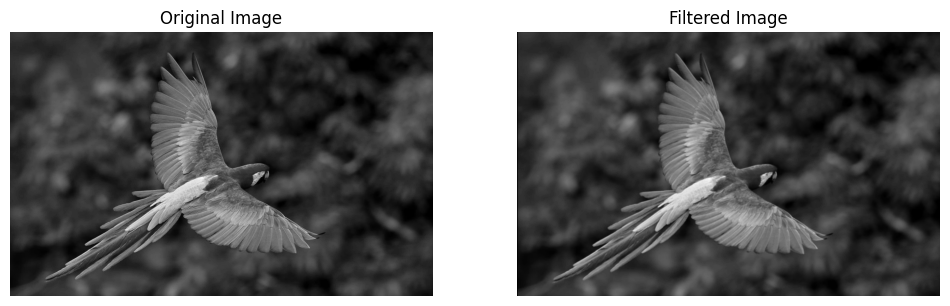

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel):
    # Convert image to a numpy array
    img_array = np.asarray(image)

    # Get image dimensions
    height, width = img_array.shape

    # Define the kernel dimensions
    kernel_height, kernel_width = kernel.shape

    # Padding dimensions
    pad_height = kernel_height-1 // 2
    pad_width = kernel_width-1 // 2

    # Pad the image array
    padded_img = np.pad(img_array, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Create an empty array to store the new filtered image
    filtered_img = np.zeros_like(img_array)

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Extract the region of interest
            region = padded_img[y:y + kernel_height, x:x + kernel_width]

            # Apply the filter (convolution)
            filtered_img[y, x] = np.sum(region * kernel)

    return Image.fromarray(filtered_img.astype(np.uint8))

# Define a 3x3 averaging filter
average_filter = np.ones((3, 3)) / 9

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply the filter
filtered_image = apply_filter(original_image, average_filter)

# Plotting the original and filtered images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

In [ ]:
average_filter = np.ones((3, 3)) / 9
print(average_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


### Weighted Average Filter
A weighted Average filter is an advanced version of the mean filter used in image processing. It works by applying weights to the pixels within the filter's neighborhood, giving different importance to different pixels. This method is more effective than a standard mean filter as it can better preserve image details while reducing noise. The weights are usually defined by a kernel, with common choices including Gaussian kernels. This type of filter is particularly useful in applications requiring a balance between noise reduction and edge preservation, such as in image smoothing and preprocessing for computer vision tasks.

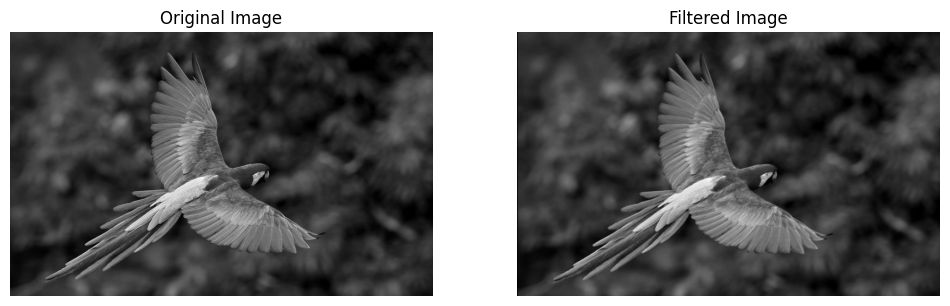

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel):
    # Convert image to a numpy array
    img_array = np.asarray(image)

    # Get image dimensions
    height, width = img_array.shape

    # Define the kernel dimensions
    kernel_height, kernel_width = kernel.shape

    # Padding dimensions
    pad_height = kernel_height-1 // 2
    pad_width = kernel_width-1 // 2

    # Pad the image array
    padded_img = np.pad(img_array, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant',constant_values=0)

    # Create an empty array to store the new filtered image
    filtered_img = np.zeros_like(img_array)

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Extract the region of interest
            region = padded_img[y:y + kernel_height, x:x + kernel_width]

            # Apply the filter (convolution)
            filtered_img[y, x] = np.sum(region * kernel)

    return Image.fromarray(filtered_img.astype(np.uint8))

# Define a 3x3 weighted average filter
weighted_average_filter = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 1]]) / 29 # Random weighted avarage filtere

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply the filter
filtered_image = apply_filter(original_image, weighted_average_filter)

# Plotting the original and filtered images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

In [ ]:
weighted_average_filter = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 1]]) / 29
print(weighted_average_filter)
kernel_height, kernel_width = weighted_average_filter.shape
print(kernel_height)
print(kernel_width)
pad_height = kernel_height- 1//2
pad_width = kernel_width- 1//2
print(kernel_height- 1//2)
print(kernel_width- 1//2)
img_array = np.asarray(original_image)
padded_img = np.pad(img_array, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant',constant_values=0)
print(padded_img.shape)

[[0.03448276 0.10344828 0.17241379]
 [0.10344828 0.17241379 0.10344828]
 [0.17241379 0.10344828 0.03448276]]
3
3
3
3
(706, 1126)


### Weighted Average Filter (Gaussian Filter)
The Gaussian filter is a widely used image processing technique for blurring images and removing detail and noise. It's named after the Gaussian (or normal) distribution, which is used to calculate the transformation applied to each pixel in the image.

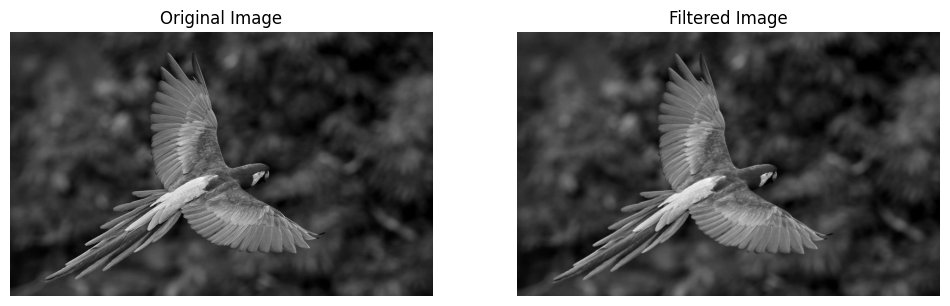

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel):
    # Convert image to a numpy array
    img_array = np.asarray(image)

    # Get image dimensions
    height, width = img_array.shape

    # Define the kernel dimensions
    kernel_height, kernel_width = kernel.shape

    # Padding dimensions
    pad_height = kernel_height-1 // 2
    pad_width = kernel_width-1 // 2

    # Pad the image array using edge mode for extended padding
    padded_img = np.pad(img_array, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')

    # Create an empty array to store the new filtered image
    filtered_img = np.zeros_like(img_array)

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Extract the region of interest
            region = padded_img[y:y + kernel_height, x:x + kernel_width]

            # Apply the filter (convolution)
            filtered_img[y, x] = np.sum(region * kernel)

    return Image.fromarray(filtered_img.astype(np.uint8))

# Define a 3x3 weighted average filter
weighted_average_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

# Define a 5x5 weighted average filter
# weighted_average_filter = np.array([[1, 2, 3, 2, 1],[2, 4, 6, 4, 2],[3, 6, 9, 6, 3],[2, 4, 6, 4, 2],[1, 2, 3, 2, 1]]) / 81

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply the filter
filtered_image = apply_filter(original_image, weighted_average_filter)

# Plotting the original and filtered images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

In [ ]:
print(np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


### Laplacian Filter
The Laplacian filter is an image processing technique used primarily for edge detection. It is a second-order derivative filter, which makes it sensitive to areas of rapid intensity change in images, typically corresponding to edges. Key characteristics of the Laplacian filter include:

1. Edge Detection: The main application of the Laplacian filter is in edge detection. It highlights regions of rapid intensity change, which are indicative of edges in the image.
    
2. Kernel: The filter uses a kernel with a specific arrangement of values designed to respond maximally to areas in the image where there is a rapid change in intensity. A common Laplacian kernel is a 3x3 matrix with a central value of -4 surrounded by 1s.
    
3. Zero Crossings: The Laplacian filter often produces an output image where edges correspond to zero crossings in the filtered result. Therefore, edge detection using the Laplacian filter involves finding these zero crossings.
    
4. Sensitivity to Noise: Since it is a second-order derivative filter, the Laplacian filter is very sensitive to noise. It's often recommended to apply a Gaussian blur to the image before using the Laplacian filter for edge detection to reduce sensitivity to noise.
    
5. Sharpening: Apart from edge detection, the Laplacian filter can also enhance the details or sharpen an image. This is achieved by subtracting the Laplacian from the original image, effectively amplifying the high-frequency components.

The Laplacian filter's ability to accentuate fine details and detect edges makes it a valuable tool in image processing tasks, especially where the precise localization of edges is crucial. However, its sensitivity to noise requires careful pre-processing to ensure accurate results.

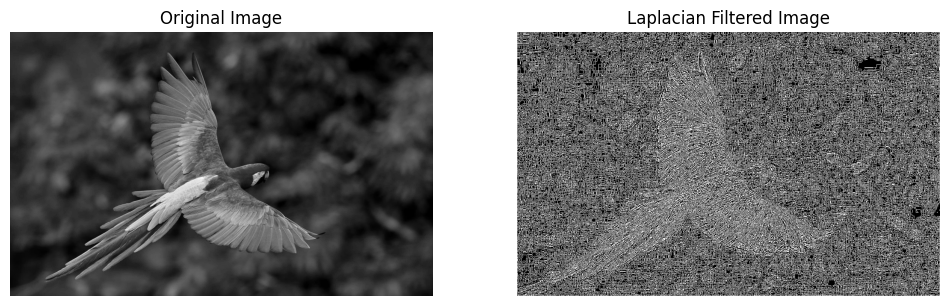

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel):
    # Convert image to a numpy array
    img_array = np.asarray(image)

    # Get image dimensions
    height, width = img_array.shape

    # Define the kernel dimensions
    kernel_height, kernel_width = kernel.shape

    # Padding dimensions
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image array using zero padding
    padded_img = np.pad(img_array, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Create an empty array to store the new filtered image
    filtered_img = np.zeros_like(img_array)

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Extract the region of interest
            region = padded_img[y:y + kernel_height, x:x + kernel_width]

            # Apply the filter (convolution)
            filtered_img[y, x] = np.sum(region * kernel)

    return Image.fromarray(filtered_img.astype(np.uint8))

# Define a Laplacian filter kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply the filter
filtered_image = apply_filter(original_image, laplacian_kernel)

# Plotting the original and filtered images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.show()


### Kernel separability
Kernel separability is an important concept in image processing that refers to the ability of a two-dimensional (2D) kernel to be broken down into two one-dimensional (1D) kernels. This property is especially useful because it can significantly reduce the computational complexity of convolution operations, which are common in image filtering and transformation tasks.

Horizontal Gaussian Kernel:
 [0.00285673 0.00480493 0.00773848 0.01193369 0.01762155 0.02491517
 0.03373136 0.04372748 0.05427819 0.06451292 0.07342069 0.08000934
 0.08348593 0.08341349 0.07980125 0.07310272 0.06412211 0.05385579
 0.04331193 0.03335285 0.02459285 0.01736342 0.01173848 0.0075987
 0.00470995]

Vertical Gaussian Kernel:
 [[0.00285673]
 [0.00480493]
 [0.00773848]
 [0.01193369]
 [0.01762155]
 [0.02491517]
 [0.03373136]
 [0.04372748]
 [0.05427819]
 [0.06451292]
 [0.07342069]
 [0.08000934]
 [0.08348593]
 [0.08341349]
 [0.07980125]
 [0.07310272]
 [0.06412211]
 [0.05385579]
 [0.04331193]
 [0.03335285]
 [0.02459285]
 [0.01736342]
 [0.01173848]
 [0.0075987 ]
 [0.00470995]]


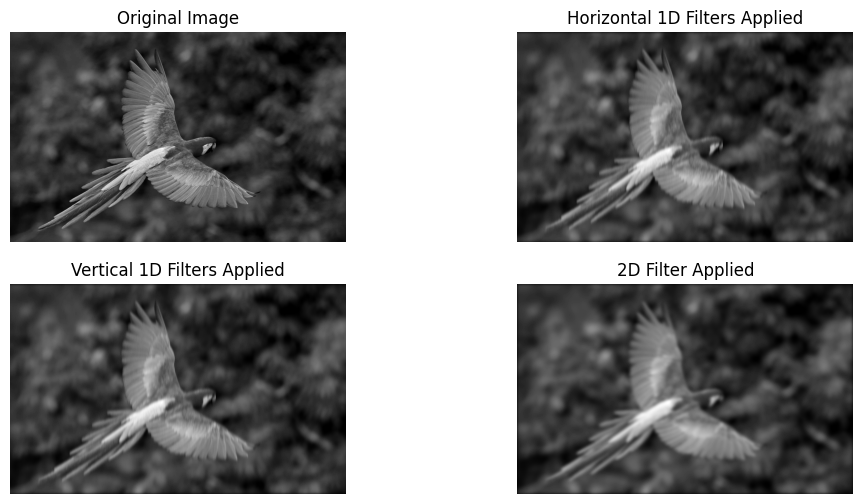

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def gaussian_kernel_1d_horizontal(sigma, length):
    """ Generate a 1D horizontal Gaussian kernel """
    x = np.linspace(-length // 2, length // 2, length)
    kernel_1d = np.exp(-(x**2) / (2 * sigma**2))
    return kernel_1d / np.sum(kernel_1d)

def gaussian_kernel_1d_vertical(sigma, length):
    """ Generate a 1D vertical Gaussian kernel """
    x = np.linspace(-length // 2, length // 2, length)
    kernel_1d = np.exp(-(x**2) / (2 * sigma**2))
    return (kernel_1d / np.sum(kernel_1d)).reshape(-1, 1)

# Parameters for the Gaussian filter
sigma = 5.0
kernel_size = 25

# Generate horizontal and vertical Gaussian kernels
horizontal_kernel = gaussian_kernel_1d_horizontal(sigma, kernel_size)
vertical_kernel = gaussian_kernel_1d_vertical(sigma, kernel_size)

# Output the kernels
print("Horizontal Gaussian Kernel:\n", horizontal_kernel)
print("\nVertical Gaussian Kernel:\n", vertical_kernel)

def apply_filter(image, kernel):
    # Determine if the kernel is horizontal or vertical
    if kernel.ndim == 1:
        # For a horizontal kernel, reshape it to (1, kernel_size)
        if kernel.shape[0] == 1:
            kernel = kernel.reshape(1, -1)
        # For a vertical kernel, reshape it to (kernel_size, 1)
        else:
            kernel = kernel.reshape(-1, 1)

    # Apply a 2D convolution
    return convolve(image, kernel, mode='constant', cval=0.0)

# Generate the equivalent 2D Gaussian filter
gaussian_2d = np.outer(horizontal_kernel, vertical_kernel)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale
img_array = np.asarray(original_image)

# Apply the 1D filters sequentially
filtered_image_1d_horizontal = apply_filter(img_array, horizontal_kernel)
filtered_image_1d_vertical = apply_filter(img_array, horizontal_kernel)

filtered_image_1d = apply_filter(filtered_image_1d_horizontal, vertical_kernel)

# Apply the 2D filter
filtered_image_2d = apply_filter(img_array, gaussian_2d)

# Plotting the original and filtered images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Image filtered with 1D Gaussian filters Horizontal
plt.subplot(2, 2, 2)
plt.imshow(filtered_image_1d_horizontal, cmap='gray')
plt.title('Horizontal 1D Filters Applied')
plt.axis('off')

# Image filtered with 1D Gaussian filters Vertical
plt.subplot(2, 2, 3)
plt.imshow(filtered_image_1d_vertical, cmap='gray')
plt.title('Vertical 1D Filters Applied')
plt.axis('off')

# Image filtered with 2D Gaussian filter
plt.subplot(2, 2, 4)
plt.imshow(filtered_image_2d, cmap='gray')
plt.title('2D Filter Applied')
plt.axis('off')

plt.show()

In [ ]:
x = np.linspace(-25 // 2, 25 // 2, 25)
print(x)

[-13.         -11.95833333 -10.91666667  -9.875       -8.83333333
  -7.79166667  -6.75        -5.70833333  -4.66666667  -3.625
  -2.58333333  -1.54166667  -0.5          0.54166667   1.58333333
   2.625        3.66666667   4.70833333   5.75         6.79166667
   7.83333333   8.875        9.91666667  10.95833333  12.        ]


### 1D Horizontal Filter Followed By 1D Vertical Filter

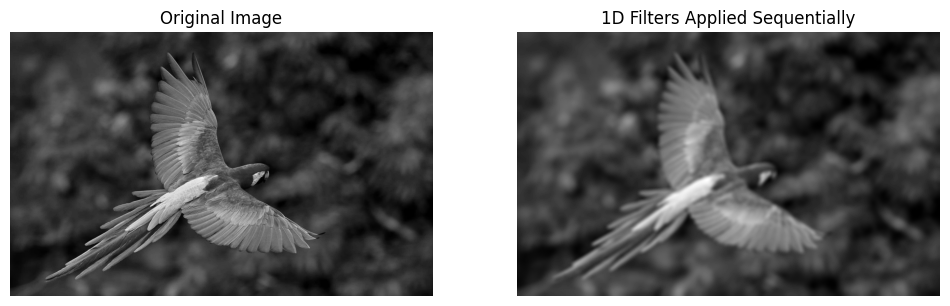

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def gaussian_kernel_1d(sigma, length):
    """ Generate a 1D Gaussian kernel """
    x = np.linspace(-length // 2, length // 2, length)
    kernel_1d = np.exp(-(x**2) / (2 * sigma**2))
    return kernel_1d / np.sum(kernel_1d)

def apply_filter_opencv(image, kernel):
    """ Apply a filter to an image using OpenCV """
    return cv2.filter2D(image, -1, kernel)

# Parameters for the Gaussian filter
sigma = 5.0
kernel_size = 15

# Generate 1D Gaussian kernels
gaussian_1d = gaussian_kernel_1d(sigma, kernel_size)

# Generate horizontal and vertical kernels
horizontal_kernel = gaussian_1d.reshape(1, -1)
vertical_kernel = gaussian_1d.reshape(-1, 1)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale
img_array = np.array(original_image)

# Apply the 1D filters sequentially using OpenCV
filtered_image_1d = apply_filter_opencv(img_array, horizontal_kernel)
filtered_image_1d = apply_filter_opencv(filtered_image_1d, vertical_kernel)

# Plotting the original and filtered images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Image filtered with 1D Gaussian filters
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_1d, cmap='gray')
plt.title('1D Filters Applied Sequentially')
plt.axis('off')

plt.show()


### Salt & Pepper Noise
Salt-and-pepper noise is a type of noise commonly seen in digital images, characterized by random occurrences of black and white pixels, resembling grains of salt and pepper. It is typically caused by sharp disturbances in signal transmission or faulty camera sensors. This noise is problematic as it introduces extreme pixel values, which can significantly degrade image quality. The most effective method for removing salt-and-pepper noise is using a median filter, which replaces each pixel with the median value of neighboring pixels, efficiently removing extreme values without blurring the image. Unlike Gaussian noise, which adds a general graininess to the entire image, salt-and-pepper noise affects pixels more sporadically and extremely.

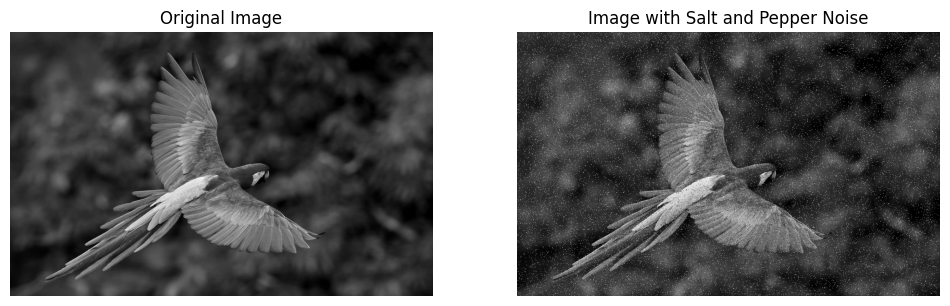

In [ ]:
import numpy as np
from PIL import Image

import numpy as np
from PIL import Image

def salt_and_pepper_noise(image, amount):
    """
    Add salt and pepper noise to an image.

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :return: Image with salt and pepper noise.
    """
    # Convert image to numpy array
    output = np.array(image)

    # Calculate the total number of pixels
    num_pixels = output.shape[0] * output.shape[1]

    # Amount of salt and pepper noise
    num_salt = np.ceil(amount * num_pixels * 0.5).astype(int)
    num_pepper = np.ceil(amount * num_pixels * 0.5).astype(int)

    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in output.shape[:2]]
    output[coords[0], coords[1]] = 255

    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in output.shape[:2]]
    output[coords[0], coords[1]] = 0

    return Image.fromarray(output)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply salt and pepper noise
noisy_image = salt_and_pepper_noise(original_image, 0.05)  # 5% of pixels

# Plotting the original and noisy images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

plt.show()


### Min Max filters for Salt & Pepper Noise
Min and max filters are specialized techniques for reducing salt-and-pepper noise in images. The min filter effectively removes the 'salt' (white pixels) by replacing each pixel with the minimum value in its neighborhood. Conversely, the max filter targets the 'pepper' (black pixels) by replacing each pixel with the maximum value around it. Using these filters in sequence—first min, then max—can significantly mitigate salt-and-pepper noise while preserving the overall structure of the image.

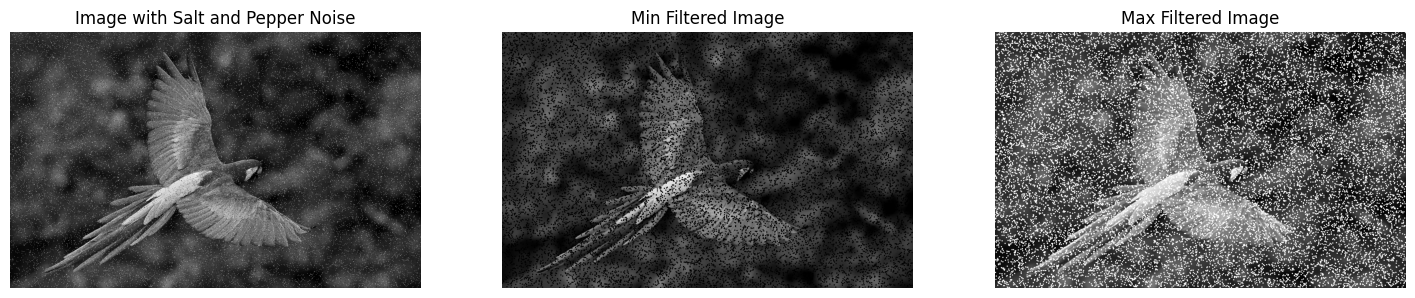

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import minimum_filter, maximum_filter

def salt_and_pepper_noise(image, amount):
    """
    Add salt and pepper noise to an image.

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :return: Image with salt and pepper noise.
    """
    # Convert image to numpy array
    output = np.array(image)

    # Calculate the total number of pixels
    num_pixels = output.shape[0] * output.shape[1]

    # Amount of salt and pepper noise
    num_salt = np.ceil(amount * num_pixels * 0.5).astype(int)
    num_pepper = np.ceil(amount * num_pixels * 0.5).astype(int)

    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in output.shape[:2]]
    output[coords[0], coords[1]] = 255

    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in output.shape[:2]]
    output[coords[0], coords[1]] = 0

    return Image.fromarray(output)

def apply_min_filter(image, kernel_size):
    """
    Apply a minimum filter to an image.

    :param image: A numpy array image.
    :param kernel_size: Size of the filter kernel.
    :return: Image after applying the minimum filter.
    """
    return minimum_filter(image, size=kernel_size)

def apply_max_filter(image, kernel_size):
    """
    Apply a maximum filter to an image.

    :param image: A numpy array image.
    :param kernel_size: Size of the filter kernel.
    :return: Image after applying the maximum filter.
    """
    return maximum_filter(image, size=kernel_size)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply salt and pepper noise
noisy_image = salt_and_pepper_noise(original_image, 0.05)  # 5% of pixels
noisy_array = np.array(noisy_image)

# Apply min and max filters
min_filtered_image = apply_min_filter(noisy_array, 3)  # Using a 3x3 kernel
max_filtered_image = apply_max_filter(noisy_array, 3)  # Using a 3x3 kernel

# Plotting the noisy, min filtered, and max filtered images using matplotlib
plt.figure(figsize=(18, 6))

# Noisy image
plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

# Min filtered image
plt.subplot(1, 3, 2)
plt.imshow(Image.fromarray(min_filtered_image), cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')

# Max filtered image
plt.subplot(1, 3, 3)
plt.imshow(Image.fromarray(max_filtered_image), cmap='gray')
plt.title('Max Filtered Image')
plt.axis('off')

plt.show()


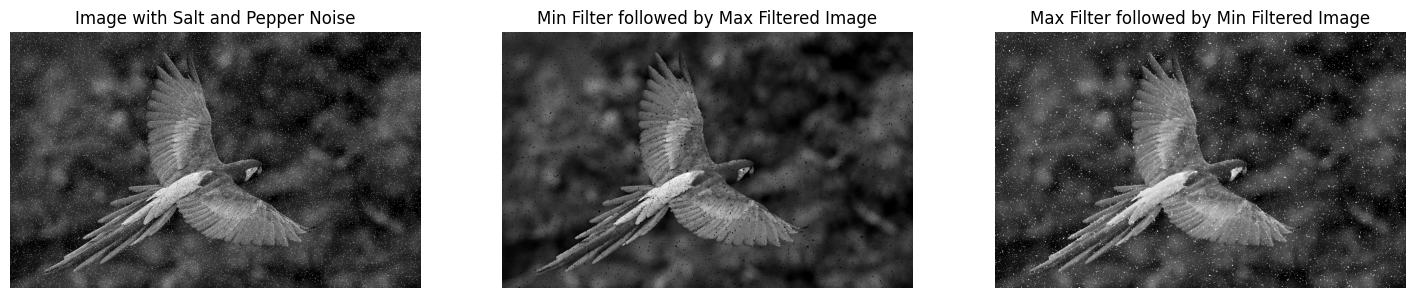

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import minimum_filter, maximum_filter

def salt_and_pepper_noise(image, amount):
    """
    Add salt and pepper noise to an image.

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :return: Image with salt and pepper noise.
    """
    # Convert image to numpy array
    output = np.array(image)

    # Calculate the total number of pixels
    num_pixels = output.shape[0] * output.shape[1]

    # Amount of salt and pepper noise
    num_salt = np.ceil(amount * num_pixels * 0.5).astype(int)
    num_pepper = np.ceil(amount * num_pixels * 0.5).astype(int)

    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in output.shape[:2]]
    output[coords[0], coords[1]] = 255

    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in output.shape[:2]]
    output[coords[0], coords[1]] = 0

    return Image.fromarray(output)

def apply_min_filter(image, kernel_size):
    """
    Apply a minimum filter to an image.

    :param image: A numpy array image.
    :param kernel_size: Size of the filter kernel.
    :return: Image after applying the minimum filter.
    """
    return minimum_filter(image, size=kernel_size)

def apply_max_filter(image, kernel_size):
    """
    Apply a maximum filter to an image.

    :param image: A numpy array image.
    :param kernel_size: Size of the filter kernel.
    :return: Image after applying the maximum filter.
    """
    return maximum_filter(image, size=kernel_size)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply salt and pepper noise
noisy_image = salt_and_pepper_noise(original_image, 0.05)  # 5% of pixels
noisy_array = np.array(noisy_image)

# Apply min and max filters
min_filtered_image = apply_min_filter(noisy_array, 3)  # Using a 3x3 kernel
max_filtered_image = apply_max_filter(noisy_array, 3)  # Using a 3x3 kernel

min_max_filtered_image = apply_max_filter(min_filtered_image, 3) # Min filter followed by Max filter
max_min_filtered_image = apply_min_filter(max_filtered_image, 3) # Max filter followed by Min filter

# Plotting the noisy, min filtered, and max filtered images using matplotlib
plt.figure(figsize=(18, 6))

# Noisy image
plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

# Min filtered image
plt.subplot(1, 3, 2)
plt.imshow(Image.fromarray(min_max_filtered_image), cmap='gray')
plt.title('Min Filter followed by Max Filtered Image')
plt.axis('off')

# Max filtered image
plt.subplot(1, 3, 3)
plt.imshow(Image.fromarray(max_min_filtered_image), cmap='gray')
plt.title('Max Filter followed by Min Filtered Image')
plt.axis('off')

plt.show()

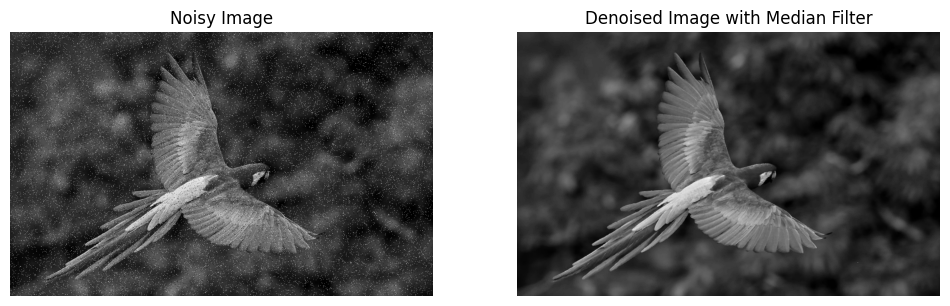

In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt


def salt_and_pepper_noise(image, amount):
    """
    Add salt and pepper noise to an image.

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :return: Image with salt and pepper noise.
    """
    # Convert image to numpy array
    output = np.array(image)

    # Calculate the total number of pixels
    num_pixels = output.shape[0] * output.shape[1]

    # Amount of salt and pepper noise
    num_salt = np.ceil(amount * num_pixels * 0.5).astype(int)
    num_pepper = np.ceil(amount * num_pixels * 0.5).astype(int)

    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in output.shape[:2]]
    output[coords[0], coords[1]] = 255

    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in output.shape[:2]]
    output[coords[0], coords[1]] = 0

    return Image.fromarray(output)


def denoise_image_median_filter(image, kernel_size):
    """
    Denoise an image using a median filter.

    :param image: A PIL Image object.
    :param kernel_size: Size of the median filter kernel.
    :return: Denoised Image.
    """
    # Convert image to numpy array
    img_array = np.array(image)

    # Apply median filter
    denoised_array = median_filter(img_array, size=kernel_size)

    return Image.fromarray(denoised_array)

# Load the noisy image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')  # Ensure it's grayscale

# Apply salt and pepper noise
noisy_image = salt_and_pepper_noise(original_image, 0.05)  # 5% of pixels

# Apply median filter for denoising
denoised_image = denoise_image_median_filter(noisy_image, 3)  # Using a 3x3 kernel

# Plotting the noisy and denoised images using matplotlib
plt.figure(figsize=(12, 6))

# Noisy image
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image with Median Filter')
plt.axis('off')

plt.show()


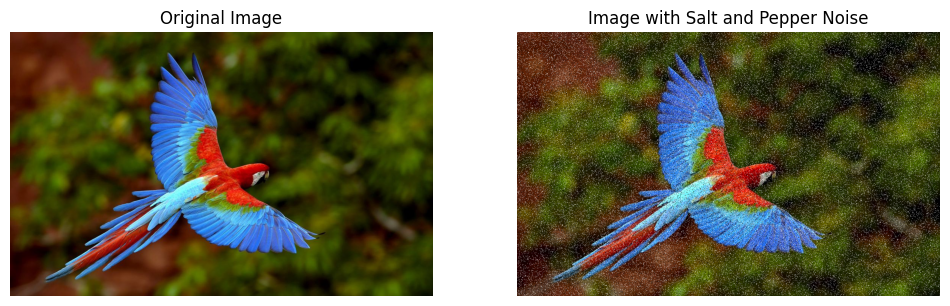

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def salt_and_pepper_noise_color(image, amount):
    """
    Add salt and pepper noise to a color image.

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :return: Color Image with salt and pepper noise.
    """
    # Convert image to numpy array
    output = np.array(image)

    # Get image dimensions
    rows, cols, _ = output.shape

    # Amount of salt and pepper noise
    num_salt = np.ceil(amount * output.size * 0.5)
    num_pepper = np.ceil(amount * output.size * 0.5)

    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in (rows, cols)]
    output[coords[0], coords[1], :] = 255

    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in (rows, cols)]
    output[coords[0], coords[1], :] = 0

    return Image.fromarray(output)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path)

# Apply salt and pepper noise
noisy_image = salt_and_pepper_noise_color(original_image, 0.05)  # 5% of pixels

# Plotting the original and noisy images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

plt.show()

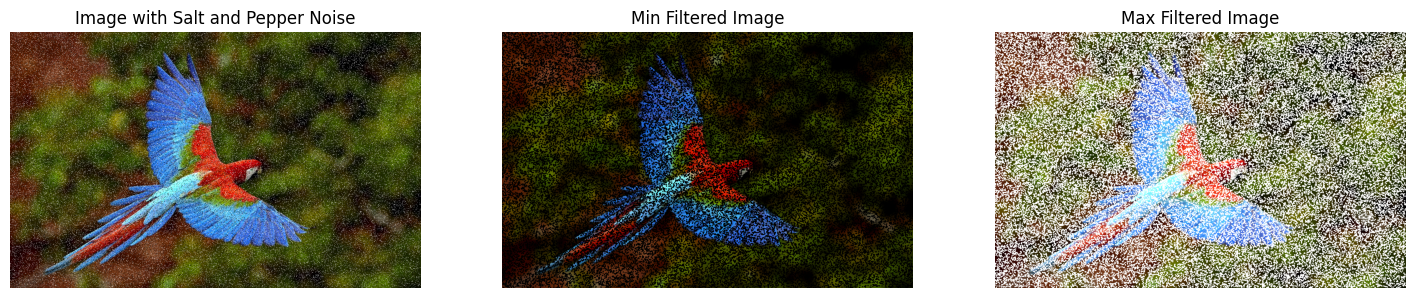

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import minimum_filter, maximum_filter


def salt_and_pepper_noise_color(image, amount):
    """
    Add salt and pepper noise to a color image.

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :return: Color Image with salt and pepper noise.
    """
    # Convert image to numpy array
    output = np.array(image)

    # Get image dimensions
    rows, cols, _ = output.shape

    # Amount of salt and pepper noise
    num_salt = np.ceil(amount * output.size * 0.5)
    num_pepper = np.ceil(amount * output.size * 0.5)

    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in (rows, cols)]
    output[coords[0], coords[1], :] = 255

    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in (rows, cols)]
    output[coords[0], coords[1], :] = 0

    return Image.fromarray(output)

def apply_min_max_filter_color(image, kernel_size):
    """
    Apply minimum and maximum filters to a color image.

    :param image: A numpy array image.
    :param kernel_size: Size of the filter kernel.
    :return: Tuple of images after applying the min and max filters.
    """
    min_filtered_image = np.zeros_like(image)
    max_filtered_image = np.zeros_like(image)

    # Apply filters to each channel
    for channel in range(image.shape[2]):
        min_filtered_image[..., channel] = minimum_filter(image[..., channel], size=kernel_size)
        max_filtered_image[..., channel] = maximum_filter(image[..., channel], size=kernel_size)

    return min_filtered_image, max_filtered_image

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path)
noisy_image = salt_and_pepper_noise_color(original_image, 0.05)  # 5% of pixels
noisy_array = np.array(noisy_image)

# Apply min and max filters
min_filtered_image, max_filtered_image = apply_min_max_filter_color(noisy_array, 3)  # Using a 3x3 kernel

# Plotting the noisy, min filtered, and max filtered images using matplotlib
plt.figure(figsize=(18, 6))

# Noisy image
plt.subplot(1, 3, 1)
plt.imshow(noisy_image)
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

# Min filtered image
plt.subplot(1, 3, 2)
plt.imshow(Image.fromarray(min_filtered_image))
plt.title('Min Filtered Image')
plt.axis('off')

# Max filtered image
plt.subplot(1, 3, 3)
plt.imshow(Image.fromarray(max_filtered_image))
plt.title('Max Filtered Image')
plt.axis('off')

plt.show()


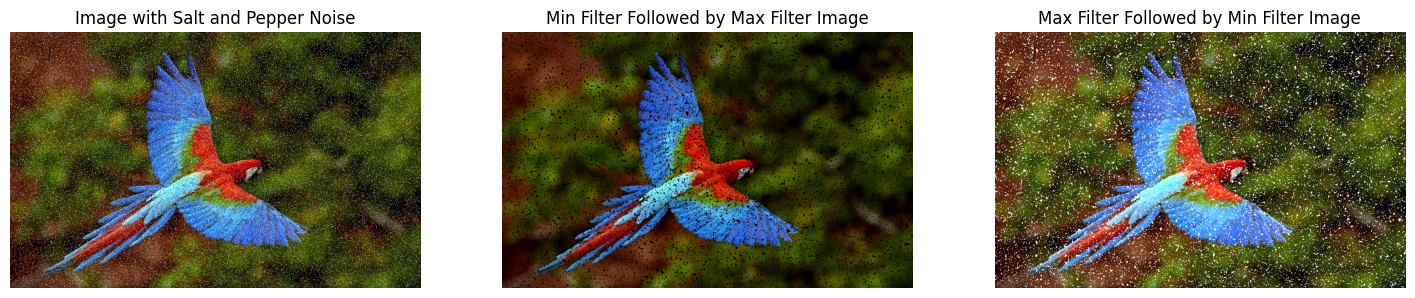

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import minimum_filter, maximum_filter


def salt_and_pepper_noise_color(image, amount):
    """
    Add salt and pepper noise to a color image.

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :return: Color Image with salt and pepper noise.
    """
    # Convert image to numpy array
    output = np.array(image)

    # Get image dimensions
    rows, cols, _ = output.shape

    # Amount of salt and pepper noise
    num_salt = np.ceil(amount * output.size * 0.5)
    num_pepper = np.ceil(amount * output.size * 0.5)

    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in (rows, cols)]
    output[coords[0], coords[1], :] = 255

    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in (rows, cols)]
    output[coords[0], coords[1], :] = 0

    return Image.fromarray(output)

def apply_min_filter_color(image, kernel_size):
    """
    Apply a minimum filter to a color image.

    :param image: A numpy array image.
    :param kernel_size: Size of the filter kernel.
    :return: Image after applying the minimum filter.
    """
    min_filtered_image = np.zeros_like(image)

    # Apply filters to each channel
    for channel in range(image.shape[2]):
        min_filtered_image[..., channel] = minimum_filter(image[..., channel], size=kernel_size)
    return min_filtered_image

def apply_max_filter_color(image, kernel_size):
    """
    Apply a maximum filter to a color image.

    :param image: A numpy array image.
    :param kernel_size: Size of the filter kernel.
    :return: Image after applying the maximum filter.
    """
    max_filtered_image = np.zeros_like(image)

    # Apply filters to each channel
    for channel in range(image.shape[2]):
        max_filtered_image[..., channel] = maximum_filter(image[..., channel], size=kernel_size)

    return max_filtered_image

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path)

# Apply salt and pepper noise
noisy_image = salt_and_pepper_noise_color(original_image, 0.05)  # 5% of pixels
noisy_array = np.array(noisy_image)

# Apply min and max filters
min_filtered_image = apply_min_filter_color(noisy_array, 3)  # Using a 3x3 kernel
max_filtered_image = apply_max_filter_color(noisy_array, 3)  # Using a 3x3 kernel

min_max_filtered_image = apply_max_filter_color(min_filtered_image, 3)  # Min filter followed by Max filter
max_min_filtered_image = apply_min_filter_color(max_filtered_image, 3)
# Plotting the noisy, min filtered, and max filtered images using matplotlib
plt.figure(figsize=(18, 6))

# Noisy image
plt.subplot(1, 3, 1)
plt.imshow(noisy_image)
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

# Min filtered image
plt.subplot(1, 3, 2)
plt.imshow(Image.fromarray(min_max_filtered_image))
plt.title('Min Filter Followed by Max Filter Image')
plt.axis('off')

# Max filtered image
plt.subplot(1, 3, 3)
plt.imshow(Image.fromarray(max_min_filtered_image))
plt.title('Max Filter Followed by Min Filter Image')
plt.axis('off')

plt.show()


To denoise the color image with salt-and-pepper noise, you can use a median filter. A median filter is particularly effective against salt-and-pepper noise. It works by moving through the image pixel by pixel, replacing each value with the median value of neighboring pixels. The size of the neighborhood is defined by a kernel, typically a small square.

Since you're dealing with a color image, you need to apply the median filter to each of the color channels separately. Here's how you can implement it in Python:

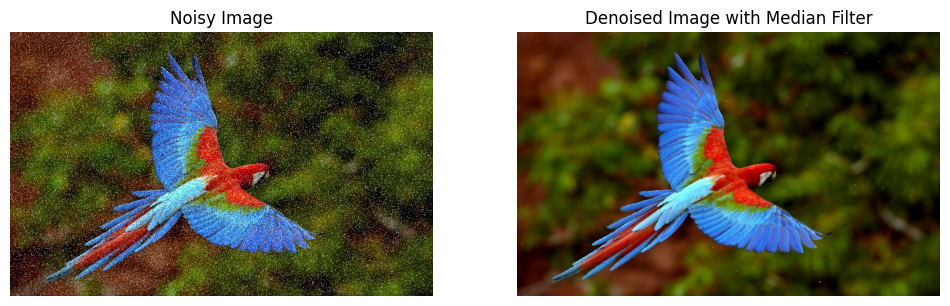

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter


def salt_and_pepper_noise_color(image, amount):
    """
    Add salt and pepper noise to a color image.

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :return: Color Image with salt and pepper noise.
    """
    # Convert image to numpy array
    output = np.array(image)

    # Get image dimensions
    rows, cols, _ = output.shape

    # Amount of salt and pepper noise
    num_salt = np.ceil(amount * output.size * 0.5)
    num_pepper = np.ceil(amount * output.size * 0.5)

    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in (rows, cols)]
    output[coords[0], coords[1], :] = 255

    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in (rows, cols)]
    output[coords[0], coords[1], :] = 0

    return Image.fromarray(output)

def apply_median_filter(image, kernel_size):
    """
    Apply a median filter to a color image.

    :param image: A PIL Image object.
    :param kernel_size: Size of the median filter kernel.
    :return: Image after applying the median filter.
    """
    # Convert image to numpy array
    img_array = np.array(image)

    # Apply median filter to each channel
    filtered_array = np.zeros_like(img_array)
    for channel in range(img_array.shape[2]):
        filtered_array[..., channel] = median_filter(img_array[..., channel], size=kernel_size)

    return Image.fromarray(filtered_array)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path)

# Apply salt and pepper noise
noisy_image = salt_and_pepper_noise_color(original_image, 0.05)  # 5% of pixels

# Apply median filter
denoised_image = apply_median_filter(noisy_image, 3)  # Using a 3x3 kernel

# Plotting the noisy and denoised images using matplotlib
plt.figure(figsize=(12, 6))

# Noisy image
plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title('Denoised Image with Median Filter')
plt.axis('off')

plt.show()

Speckle noise is a kind of noise that can be modeled by multiplying the image by a random variable. It often presents in applications like ultrasound images and radar.

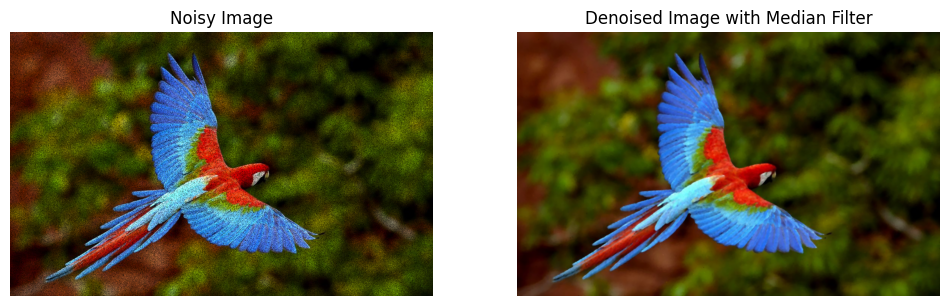

In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

def add_speckle_noise(image, amount, variance=0.5):
    """
    Add speckle noise to random pixels in an image as defined by noise_image = I * (1 + random_noise).

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :param variance: Variance of the speckle noise.
    :return: Image with speckle noise.
    """
    # Convert image to numpy array
    img_array = np.array(image, dtype=float)

    # Calculate number of pixels to alter
    num_pixels = int(amount * img_array.shape[0] * img_array.shape[1])

    # Generate speckle noise for selected pixels
    noise = np.random.normal(0, variance, num_pixels)

    # Randomly pick pixel indices
    indices = np.random.choice(img_array.shape[0] * img_array.shape[1], num_pixels, replace=False)

    # Apply noise to the selected pixels
    for idx in indices:
        x, y = divmod(idx, img_array.shape[1])
        img_array[x, y] *= (1 + noise[idx % num_pixels])

    img_array = np.clip(img_array, 0, 255)

    return Image.fromarray(img_array.astype(np.uint8))

def denoise_image_median_filter(image, kernel_size):
    # [The same as before]
    """
    Apply a median filter to a color image.

    :param image: A PIL Image object.
    :param kernel_size: Size of the median filter kernel.
    :return: Image after applying the median filter.
    """
    # Convert image to numpy array
    img_array = np.array(image)

    # Apply median filter to each channel
    filtered_array = np.zeros_like(img_array)
    for channel in range(img_array.shape[2]):
        filtered_array[..., channel] = median_filter(img_array[..., channel], size=kernel_size)

    return Image.fromarray(filtered_array)

# Load your image
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path)

# Add speckle noise to random pixels in the image
noisy_image = add_speckle_noise(original_image, amount=0.5)

# Apply median filter for denoising
denoised_image = denoise_image_median_filter(noisy_image, 5)  # Using a 3x3 kernel

plt.figure(figsize=(12, 6))

# Noisy image
plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title('Denoised Image with Median Filter')
plt.axis('off')

plt.show()